In [50]:
!pip install anomalib==2.2.0 torch torchvision pytorch-lightning torchmetrics opencv-python

In [51]:
from anomalib.data import MVTecAD
from anomalib.models import Patchcore
from anomalib.engine import Engine
import torch

if torch.cuda.is_available():
    print("GPU is available!")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")

categories = ["grid", "leather", "tile"]
results = {}

GPU is available!
GPU Name: NVIDIA A100-SXM4-40GB


In [52]:
import os
import pickle

ASSET_DIR = "patchcore_assets"
os.makedirs(ASSET_DIR, exist_ok=True)

for category in categories:
    print(f"\n{'='*60}\nProcessing category: {category}\n{'='*60}")

    # this will load the MVTech module
    mvt_module = MVTecAD(
        root="datasets/MVTecAD",
        category=category,
        train_batch_size=32,
        eval_batch_size=32,
        num_workers=4,
    )

    # preprossors point which is the image size and cropped size
    preprocessor = Patchcore.configure_pre_processor(
        image_size=(256, 256),
        center_crop_size=(224, 224)
    )

    # this is the pretrained model
    patchcore_model = Patchcore(
        backbone="wide_resnet50_2",
        layers=["layer2", "layer3"],
        coreset_sampling_ratio=0.1,
        pre_trained=True,
        pre_processor=preprocessor
    )

    # initialize the engine
    engine = Engine()

    # this will train the model
    engine.fit(model= patchcore_model , datamodule= mvt_module )


    memory_bank = patchcore_model.model.memory_bank.data
    memory_bank_path = os.path.join(ASSET_DIR, f"{category}_memory_bank.pt")
    torch.save(memory_bank, memory_bank_path)
    print(f"Saved memory bank for {category} to {memory_bank_path}")
    preprocessor_config = {
        "image_size": (256, 256),
        "center_crop_size": (224, 224),
    }
    with open(os.path.join(ASSET_DIR, f"{category}_preprocessor_config.pkl"), 'wb') as f:
        pickle.dump(preprocessor_config, f)


    # and this will test the model
    metrics = engine.test(model= patchcore_model , datamodule= mvt_module)

    # we know need to extract the AUROC metrics which is in a dictonary within a list
    metrics = metrics[0]
    image_auroc = metrics["image_AUROC"]
    pixel_auroc = metrics["pixel_AUROC"]
    results[category] = {"image_AUROC": image_auroc, "pixel_AUROC": pixel_auroc}






Processing category: grid


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'pre_processor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['pre_processor'])`.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
INFO: 
  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | pre_processor  | PreProcessor   | 0      | train
1 | p

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/20697 [00:00<?, ?it/s]

Selecting Coreset Indices.:   1%|          | 138/20697 [00:00<00:14, 1376.51it/s]

Selecting Coreset Indices.:   1%|▏         | 278/20697 [00:00<00:14, 1386.57it/s]

Selecting Coreset Indices.:   2%|▏         | 417/20697 [00:00<00:14, 1385.95it/s]

Selecting Coreset Indices.:   3%|▎         | 559/20697 [00:00<00:14, 1396.41it/s]

Selecting Coreset Indices.:   3%|▎         | 705/20697 [00:00<00:14, 1417.34it/s]

Selecting Coreset Indices.:   4%|▍         | 849/20697 [00:00<00:13, 1422.98it/s]

Selecting Coreset Indices.:   5%|▍         | 992/20697 [00:00<00:13, 1423.02it/s]

Selecting Coreset Indices.:   6%|▌         | 1140/20697 [00:00<00:13, 1438.07it/s]

Selecting Coreset Indices.:   6%|▌         | 1285/20697 [00:00<00:13, 1441.25it/s]

Selecting Coreset Indices.:   7%|▋         | 1430/20697 [00:01<00:13, 1440.25it/s]

Selecting Coreset Indices.:   8%|▊         | 1576/20697 [00:01<00:13, 1444.37it/s]

Selecting 

Saved memory bank for grid to patchcore_assets/grid_memory_bank.pt


INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9791145324707031     │
│       image_F1Score       │    0.9557521939277649     │
│        pixel_AUROC        │    0.9798437356948853     │
│       pixel_F1Score       │    0.3780943751335144     │
└───────────────────────────┴───────────────────────────┘


Processing category: leather


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'pre_processor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['pre_processor'])`.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
INFO: 
  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | pre_processor  | PreProcessor   | 0      | train
1 | p

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/19208 [00:00<?, ?it/s]

Selecting Coreset Indices.:   1%|          | 144/19208 [00:00<00:13, 1430.73it/s]

Selecting Coreset Indices.:   2%|▏         | 300/19208 [00:00<00:12, 1502.95it/s]

Selecting Coreset Indices.:   2%|▏         | 460/19208 [00:00<00:12, 1546.96it/s]

Selecting Coreset Indices.:   3%|▎         | 622/19208 [00:00<00:11, 1574.28it/s]

Selecting Coreset Indices.:   4%|▍         | 784/19208 [00:00<00:11, 1587.80it/s]

Selecting Coreset Indices.:   5%|▍         | 946/19208 [00:00<00:11, 1597.52it/s]

Selecting Coreset Indices.:   6%|▌         | 1106/19208 [00:00<00:11, 1594.59it/s]

Selecting Coreset Indices.:   7%|▋         | 1266/19208 [00:00<00:11, 1580.79it/s]

Selecting Coreset Indices.:   7%|▋         | 1425/19208 [00:00<00:11, 1583.35it/s]

Selecting Coreset Indices.:   8%|▊         | 1584/19208 [00:01<00:11, 1571.41it/s]

Selecting Coreset Indices.:   9%|▉         | 1743/19208 [00:01<00:11, 1574.61it/s]

Selecting

Saved memory bank for leather to patchcore_assets/leather_memory_bank.pt


INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │     0.994535505771637     │
│        pixel_AUROC        │     0.989928126335144     │
│       pixel_F1Score       │     0.442030668258667     │
└───────────────────────────┴───────────────────────────┘


Processing category: tile


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'pre_processor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['pre_processor'])`.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
INFO: 
  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | pre_processor  | PreProcessor   | 0      | train
1 | p

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/18032 [00:00<?, ?it/s]

Selecting Coreset Indices.:   1%|          | 157/18032 [00:00<00:11, 1567.62it/s]

Selecting Coreset Indices.:   2%|▏         | 319/18032 [00:00<00:11, 1593.91it/s]

Selecting Coreset Indices.:   3%|▎         | 480/18032 [00:00<00:10, 1599.03it/s]

Selecting Coreset Indices.:   4%|▎         | 645/18032 [00:00<00:10, 1617.67it/s]

Selecting Coreset Indices.:   4%|▍         | 809/18032 [00:00<00:10, 1625.65it/s]

Selecting Coreset Indices.:   5%|▌         | 974/18032 [00:00<00:10, 1632.02it/s]

Selecting Coreset Indices.:   6%|▋         | 1139/18032 [00:00<00:10, 1637.67it/s]

Selecting Coreset Indices.:   7%|▋         | 1303/18032 [00:00<00:10, 1636.73it/s]

Selecting Coreset Indices.:   8%|▊         | 1467/18032 [00:00<00:10, 1622.96it/s]

Selecting Coreset Indices.:   9%|▉         | 1631/18032 [00:01<00:10, 1625.85it/s]

Selecting Coreset Indices.:  10%|▉         | 1796/18032 [00:01<00:09, 1632.21it/s]

Selecting

Saved memory bank for tile to patchcore_assets/tile_memory_bank.pt


INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9873737096786499     │
│       image_F1Score       │    0.9818181991577148     │
│        pixel_AUROC        │    0.9473432302474976     │
│       pixel_F1Score       │    0.6204697489738464     │
└───────────────────────────┴───────────────────────────┘

In [53]:
#Showing the AUROC for each catagory type
for cat, vals in results.items():
    print(f"{cat.capitalize()} → Image AUROC: {vals['image_AUROC']:.4f}, Pixel AUROC: {vals['pixel_AUROC']:.4f}")

# The means of Image AUROC and Pixel AUROC
image_mean = torch.tensor([v["image_AUROC"] for v in results.values()]).mean().item()
pixel_mean = torch.tensor([v["pixel_AUROC"] for v in results.values()]).mean().item()

print("\nAverage across flat surfaces:")
print(f"→ Mean Image AUROC: {image_mean:.4f}")
print(f"→ Mean Pixel AUROC: {pixel_mean:.4f}")


Grid → Image AUROC: 0.9791, Pixel AUROC: 0.9798
Leather → Image AUROC: 1.0000, Pixel AUROC: 0.9899
Tile → Image AUROC: 0.9874, Pixel AUROC: 0.9473

Average across flat surfaces:
→ Mean Image AUROC: 0.9888
→ Mean Pixel AUROC: 0.9724


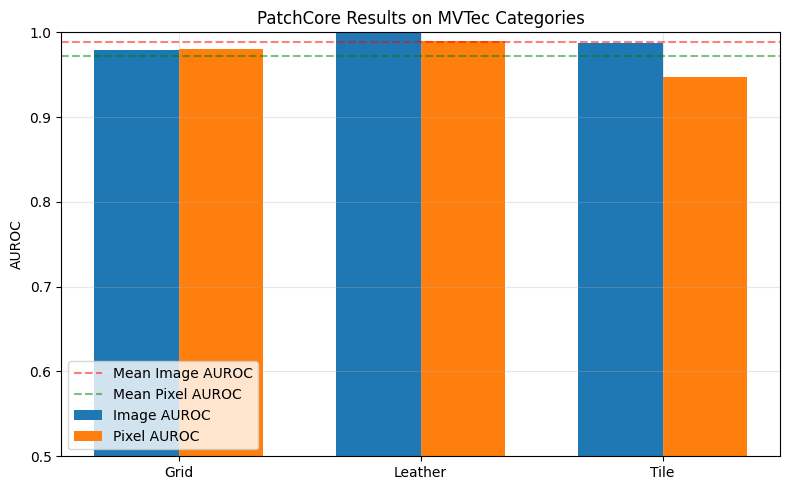

In [54]:
import matplotlib.pyplot as plt

categories = list(results.keys())
image_aurocs = [v["image_AUROC"] for v in results.values()]
pixel_aurocs = [v["pixel_AUROC"] for v in results.values()]

plt.figure(figsize=(8,5))
bar_width = 0.35
x = torch.arange(len(categories))

plt.bar(x - bar_width/2, image_aurocs, width=bar_width, label="Image AUROC")
plt.bar(x + bar_width/2, pixel_aurocs, width=bar_width, label="Pixel AUROC")

plt.axhline(image_mean, color='red', linestyle='--', alpha=0.5, label="Mean Image AUROC")
plt.axhline(pixel_mean, color='green', linestyle='--', alpha=0.5, label="Mean Pixel AUROC")

plt.xticks(x, [c.capitalize() for c in categories])
plt.ylim(0.5, 1.0)
plt.ylabel("AUROC")
plt.title("PatchCore Results on MVTec Categories")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
